In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader.data as web
from  datetime import datetime
from pandas.util.testing import assert_frame_equal
start = datetime(2009,1,1)
end = datetime(2020,1,1)
nifty = web.DataReader('^NSEI','yahoo',start,end)
nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,3079.850098,3021.800049,3034.600098,3046.750000,0.0,3046.750000
2009-01-05,3131.949951,3056.449951,3058.750000,3121.449951,0.0,3121.449951
2009-01-06,3141.800049,3056.100098,3121.500000,3112.800049,0.0,3112.800049
2009-01-07,3147.199951,2888.199951,3112.800049,2920.399902,0.0,2920.399902
2009-01-09,2929.850098,2810.250000,2919.949951,2873.000000,0.0,2873.000000


In [4]:
nifty[nifty['Volume'] != 0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-21,6094.350098,6065.100098,6085.750000,6082.299805,130900.0,6082.299805
2013-01-22,6101.299805,6040.500000,6080.149902,6048.500000,129000.0,6048.500000
2013-01-23,6069.799805,6021.149902,6052.850098,6054.299805,137000.0,6054.299805
2013-01-24,6065.299805,6007.850098,6046.200195,6019.350098,185200.0,6019.350098
2013-01-25,6080.549805,6014.450195,6024.500000,6074.649902,147600.0,6074.649902
...,...,...,...,...,...,...
2019-12-26,12221.549805,12118.849609,12211.849609,12126.549805,500.0,12126.549805
2019-12-27,12258.450195,12157.900391,12172.900391,12245.799805,400.0,12245.799805
2019-12-30,12286.450195,12213.799805,12274.900391,12255.849609,400.0,12255.849609


In [5]:
nifty_reset = nifty.copy()

In [6]:
#lookback period is a parameter to be optimized
look_back = 21
nifty['returns'] = nifty['Adj Close'].pct_change()
nifty['R-1'] = nifty['returns'].shift(1)
nifty['P-1'] = nifty['Adj Close'].shift(1)
nifty['MA21'] = nifty['R-1'].rolling(look_back).mean()
nifty['SD21'] = nifty['R-1'].rolling(look_back).std()
nifty.tail()

,High,Low,Open,Close,Volume,Adj Close,returns,R-1,P-1,MA21,SD21
Date,,,,,,,,,,,
2019-12-26,12221.549805,12118.849609,12211.849609,12126.549805,500.0,12126.549805,-0.007205,-0.003931,12214.549805,0.000565,0.005205
2019-12-27,12258.450195,12157.900391,12172.900391,12245.799805,400.0,12245.799805,0.009834,-0.007205,12126.549805,0.000364,0.005426
2019-12-30,12286.450195,12213.799805,12274.900391,12255.849609,400.0,12255.849609,0.000821,0.009834,12245.799805,0.000583,0.005717
2019-12-31,12247.099609,12151.799805,12247.099609,12168.450195,400.0,12168.450195,-0.007131,0.000821,12255.849609,0.000424,0.005659
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000,0.001155,-0.007131,12168.450195,0.000457,0.005610


In [7]:
#Returns are assumed to be normally distributed. Monte-carlo simulation method is used to generate 
#random trials and their average is taken.
nifty['pred_returns'] = np.NaN
nifty['pred_price'] = np.NaN
for i in nifty.index:
    nifty.loc[i,'pred_returns'] = np.mean(np.random.normal(nifty.loc[i,'MA21'], nifty.loc[i,'SD21'], 10000))
    nifty.loc[i,'pred_price'] = nifty.loc[i,'P-1']*(1+nifty.loc[i,'pred_returns'])

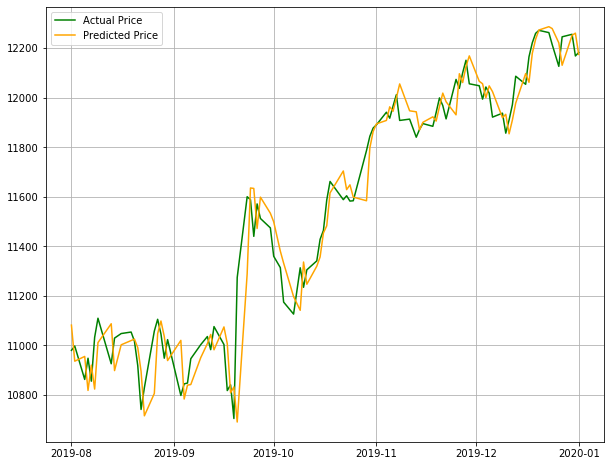

In [9]:
#plot the recent 100 predictions
plt.figure(figsize=(10,8))
plt.plot(nifty['Adj Close'][-100:],c='green',label='Actual Price')
plt.plot(nifty['pred_price'][-100:],c='orange',label='Predicted Price')
plt.legend()
plt.grid()
plt.show()

In [10]:
nifty1 = nifty[['Adj Close', 'pred_price']].copy()
nifty1.tail()

,Adj Close,pred_price
Date,,
2019-12-26,12126.549805,12221.359306
2019-12-27,12245.799805,12130.883229
2019-12-30,12255.849609,12251.913940
2019-12-31,12168.450195,12260.572929
2020-01-01,12182.500000,12174.676446


In [11]:
nifty1.dropna(inplace=True)
nifty1['error'] = ((np.abs(nifty1['Adj Close']-nifty1['pred_price']))/nifty1['Adj Close']) * 100
nifty1.head()

,Adj Close,pred_price,error
Date,,,
2009-02-05,2780.050049,2792.208585,0.437350
2009-02-06,2843.100098,2765.042476,2.745511
2009-02-09,2919.899902,2831.924464,3.012961
2009-02-10,2934.500000,2921.530152,0.441978
2009-02-11,2925.699951,2939.345896,0.466416


In [12]:
nifty1.to_excel('normal-ret-model.xlsx')

In [13]:
from sklearn.metrics import mean_squared_error
rmse_dict = dict()
rmse_dict['normal_returns'] = np.sqrt(mean_squared_error(nifty1['Adj Close'].values,nifty1['pred_price'].values))
rmse_dict

{'normal_returns': 74.91610456249359}

### Machine Learning implementation

In [14]:
import talib

In [15]:
def create_features(df):
    df['high_lag'] = df['High'].shift(1)
    df['low_lag'] = df['Low'].shift(1)
    df['close_lag'] = df['Adj Close'].shift(1)
    df['volume_lag'] = df['Volume'].shift(1)
    df['returns'] = df['close_lag'].pct_change()
    
    ema_list = [2,5,10,20]
    for ema in ema_list:
        col = 'ema_' + str(ema)
        df[col] = talib.EMA(df['close_lag'], ema)
    
    df['RSI'] = talib.RSI(df['close_lag'], 14)
    g1,g2,df['MACD'] = talib.MACD(df['close_lag'])
    df['ATR'] = talib.ATR(df['high_lag'], df['low_lag'], df['close_lag'])
    df['WCLP'] = talib.WCLPRICE(df['high_lag'], df['low_lag'], df['close_lag'])
    df['ADOSC'] = talib.ADOSC(df['high_lag'], df['low_lag'], df['close_lag'],df['volume_lag'])
    df.dropna(inplace=True)
    
    return df

In [16]:
nifty_RF = nifty_reset.copy()
nifty_RF = create_features(nifty_RF)
nifty_RF.head()

,High,Low,Open,Close,Volume,Adj Close,high_lag,low_lag,close_lag,volume_lag,returns,ema_2,ema_5,ema_10,ema_20,RSI,MACD,ATR,WCLP,ADOSC
Date,,,,,,,,,,,,,,,,,,,,
2009-02-24,2746.199951,2677.550049,2737.250000,2733.899902,0.0,2733.899902,2789.300049,2709.300049,2736.449951,0.0,-0.018965,2753.719307,2787.835847,2815.021413,2832.595327,39.344620,-10.145759,84.198695,2742.875000,0.0
2009-02-25,2789.350098,2733.449951,2733.449951,2762.500000,0.0,2762.500000,2746.199951,2677.550049,2733.899902,0.0,-0.000932,2740.506370,2769.857199,2800.272047,2823.195762,39.193203,-11.992088,83.088067,2722.887451,0.0
2009-02-26,2797.800049,2731.899902,2762.199951,2785.649902,0.0,2785.649902,2789.350098,2733.449951,2762.500000,0.0,0.010461,2755.168790,2767.404799,2793.404402,2817.415214,41.894121,-10.575699,81.146072,2761.950012,0.0
2009-02-27,2787.199951,2708.449951,2785.699951,2763.649902,0.0,2763.649902,2797.800049,2731.899902,2785.649902,0.0,0.008380,2775.489532,2773.486500,2791.994493,2814.389946,44.060066,-7.512267,80.057078,2775.249939,0.0
2009-03-02,2764.600098,2659.550049,2764.600098,2674.600098,0.0,2674.600098,2787.199951,2708.449951,2763.649902,0.0,-0.007898,2767.596445,2770.207634,2786.840931,2809.557561,42.440976,-6.441330,79.963715,2755.737427,0.0


In [17]:
def split_data(df, train, valid, test):
    if train + valid + test == 1:
        n_len = len(df)
        split_train = int(train*n_len)
        split_valid = int((train+valid)*n_len)
        df_train = df[:split_train+1].copy()
        df_valid = df[split_train+1:split_valid+1].copy()
        df_test = df[split_valid+1:].copy()
        return df_train, df_valid, df_test
    else:
        raise ValueError('Split values not compatible')

In [18]:
train = 0.6
valid = 0.2
test = 0.2
nifty_RF_train, nifty_RF_valid, nifty_RF_test = split_data(nifty_RF, train, valid, test)
nifty_RF_train.head()

,High,Low,Open,Close,Volume,Adj Close,high_lag,low_lag,close_lag,volume_lag,returns,ema_2,ema_5,ema_10,ema_20,RSI,MACD,ATR,WCLP,ADOSC
Date,,,,,,,,,,,,,,,,,,,,
2009-02-24,2746.199951,2677.550049,2737.250000,2733.899902,0.0,2733.899902,2789.300049,2709.300049,2736.449951,0.0,-0.018965,2753.719307,2787.835847,2815.021413,2832.595327,39.344620,-10.145759,84.198695,2742.875000,0.0
2009-02-25,2789.350098,2733.449951,2733.449951,2762.500000,0.0,2762.500000,2746.199951,2677.550049,2733.899902,0.0,-0.000932,2740.506370,2769.857199,2800.272047,2823.195762,39.193203,-11.992088,83.088067,2722.887451,0.0
2009-02-26,2797.800049,2731.899902,2762.199951,2785.649902,0.0,2785.649902,2789.350098,2733.449951,2762.500000,0.0,0.010461,2755.168790,2767.404799,2793.404402,2817.415214,41.894121,-10.575699,81.146072,2761.950012,0.0
2009-02-27,2787.199951,2708.449951,2785.699951,2763.649902,0.0,2763.649902,2797.800049,2731.899902,2785.649902,0.0,0.008380,2775.489532,2773.486500,2791.994493,2814.389946,44.060066,-7.512267,80.057078,2775.249939,0.0
2009-03-02,2764.600098,2659.550049,2764.600098,2674.600098,0.0,2674.600098,2787.199951,2708.449951,2763.649902,0.0,-0.007898,2767.596445,2770.207634,2786.840931,2809.557561,42.440976,-6.441330,79.963715,2755.737427,0.0


In [19]:
def split_variables(df):
    x = df.iloc[:,6:].copy()
    y = df.iloc[:,5].copy()
    return x,y

In [20]:
X_train, y_train = split_variables(nifty_RF_train)
X_valid, y_valid = split_variables(nifty_RF_valid)
X_test, y_test = split_variables(nifty_RF_test)

In [21]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling - Transform the features using MinMax scaler before training the model

In [22]:
X = pd.DataFrame()
X = X.append(X_train)
X = X.append(X_valid)
X = X.append(X_test)
sc = MinMaxScaler()
sc.fit(X)
X_train = sc.transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[0.01737373, 0.01748634, 0.0168374 , ..., 0.22976493, 0.01672424,
        0.46911611],
       [0.01291786, 0.01421763, 0.01657447, ..., 0.22236244, 0.01466191,
        0.46911611],
       [0.01737891, 0.01997261, 0.01952335, ..., 0.20941879, 0.0186924 ,
        0.46911611],
       ...,
       [0.54884645, 0.53922458, 0.53808522, ..., 0.63509994, 0.54086326,
        0.36153367],
       [0.55231502, 0.54799603, 0.55428336, ..., 0.64782895, 0.55203124,
        0.43460046],
       [0.56556885, 0.55822428, 0.55974804, ..., 0.64588982, 0.56063518,
        0.44151432]])

In [24]:
y_train.values

array([2733.89990234, 2762.5       , 2785.64990234, ..., 7948.95019531,
       8001.95019531, 7971.29980469])

### Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.model_selection import KFold, GridSearchCV

In [27]:
estimator = RandomForestRegressor()

params_grid = {'n_estimators' : list(range(70,101,10)), 'max_features' : list(range(4,11,2))}
cv = KFold(n_splits=5, shuffle=False)

X = np.append(X_train,X_valid, axis=0 )
y = np.append(y_train.values,y_valid.values, axis=0 ) 


In [28]:
grid_reg = GridSearchCV(estimator= estimator,param_grid=params_grid,cv=cv)
grid_reg.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [70, 80, 90, 100], 'max_features': [4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
y_pred = grid_reg.predict(X_test)

In [30]:
y_pred

array([10288.20348633, 10316.03286133, 10290.39493164, 10280.06186523,
       10276.62095703, 10267.70250977, 10270.10552734, 10276.40152344,
       10273.40944336, 10261.80494141, 10223.20841797, 10120.0830957 ,
       10219.33390625, 10271.02589844, 10265.37490234, 10268.50841797,
       10269.1859375 , 10256.76148437, 10253.86993164, 10260.90645508,
       10261.92798828, 10257.64000977, 10248.53999023, 10192.62141602,
       10121.0940625 , 10109.49057617, 10040.05856445, 10126.90505859,
       10244.87986328, 10269.92337891, 10267.60693359, 10229.88490234,
       10242.22186523, 10277.58244141, 10250.33143555, 10310.13436523,
       10334.66101563, 10332.40151367, 10328.42240234, 10327.53441406,
       10334.66101563, 10311.71399414, 10295.05986328, 10276.68147461,
       10271.98249023, 10274.78740234, 10277.42740234, 10281.1219043 ,
       10278.46441406, 10283.76700195, 10264.4409082 , 10263.52889648,
       10280.95891602, 10276.22899414, 10288.8384082 , 10291.09189453,
      

In [31]:
y_test

Date
2017-11-01    10440.500000
2017-11-02    10423.799805
2017-11-03    10452.500000
2017-11-06    10451.799805
2017-11-07    10350.150391
                  ...     
2019-12-26    12126.549805
2019-12-27    12245.799805
2019-12-30    12255.849609
2019-12-31    12168.450195
2020-01-01    12182.500000
Name: Adj Close, Length: 529, dtype: float64

In [34]:
RF_results = pd.DataFrame(index=nifty_RF_test.index) 
RF_results['Actual Nifty'] = y_test.values
RF_results['Predicted Nifty'] = y_pred
RF_results.head()

,Actual Nifty,Predicted Nifty
Date,,
2017-11-01,10440.500000,10288.203486
2017-11-02,10423.799805,10316.032861
2017-11-03,10452.500000,10290.394932
2017-11-06,10451.799805,10280.061865
2017-11-07,10350.150391,10276.620957


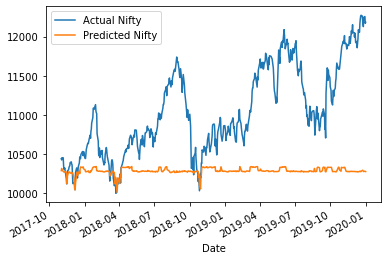

In [35]:
RF_results.plot() #Have to reowrk the model

### MLP Regression

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
mlp = MLPRegressor(random_state=0, max_iter=2500).fit(X, y)

In [38]:
y_pred_mlp = mlp.predict(X_test)

In [39]:
y_pred_mlp

array([10339.81361927, 10462.10551667, 10420.03750947, 10461.83918695,
       10463.3815405 , 10348.04663479, 10294.25256818, 10291.73880922,
       10296.50072696, 10198.26861763, 10152.7806372 , 10072.57977865,
       10190.52514652, 10242.73621657, 10243.55615723, 10282.34998678,
       10298.93715992, 10314.21853211, 10372.45494696, 10383.36295254,
       10361.74226825, 10360.41221276, 10196.69151894, 10118.09159245,
       10122.60184085, 10097.38434514, 10017.92545591, 10163.17242309,
       10253.0927682 , 10316.00537578, 10230.10552534, 10200.38392006,
       10260.28055564, 10334.40985282, 10343.2492345 , 10464.69850967,
       10438.93453747, 10439.39416854, 10499.53893997, 10537.50624888,
       10495.10223584, 10479.26770667, 10537.91163692, 10432.55461748,
       10456.42121752, 10512.04977481, 10568.14628823, 10640.35994977,
       10649.95404447, 10652.73008298, 10684.28103916, 10716.35221326,
       10786.25522472, 10716.09185226, 10810.07319573, 10827.88186609,
      

In [42]:
mlp_results = pd.DataFrame(index=nifty_RF_test.index)
mlp_results['Actual Nifty'] = y_test.values
mlp_results['Predicted Nifty'] = y_pred_mlp
mlp_results.head()

,Actual Nifty,Predicted Nifty
Date,,
2017-11-01,10440.500000,10339.813619
2017-11-02,10423.799805,10462.105517
2017-11-03,10452.500000,10420.037509
2017-11-06,10451.799805,10461.839187
2017-11-07,10350.150391,10463.381541


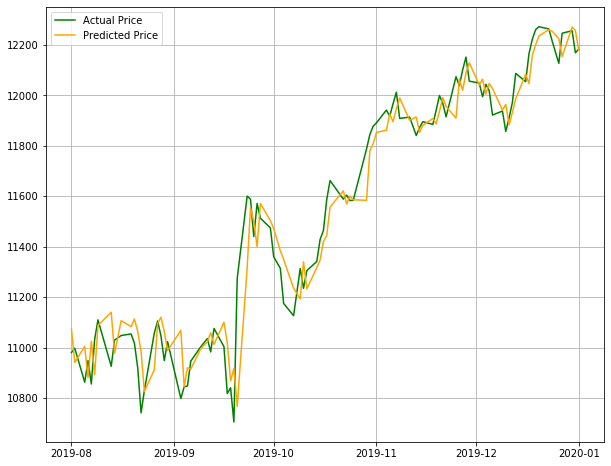

In [43]:
#plot the recent 100 predictions
plt.figure(figsize=(10,8))
plt.plot(mlp_results['Actual Nifty'][-100:],c='green',label='Actual Price')
plt.plot(mlp_results['Predicted Nifty'][-100:],c='orange',label='Predicted Price')
plt.legend()
plt.grid()
plt.show()

In [45]:
save = mlp_results.iloc[-100:,:].copy()
save['error'] = ((np.abs(save['Actual Nifty']-save['Predicted Nifty']))/save['Actual Nifty']) * 100
save.head()

,Actual Nifty,Predicted Nifty,error
Date,,,
2019-08-01,10980.000000,11073.220524,0.849003
2019-08-02,10997.349609,10941.063392,0.511816
2019-08-05,10862.599609,11004.638498,1.307596
2019-08-06,10948.250000,10880.740553,0.616623
2019-08-07,10855.500000,11024.910298,1.560594


In [46]:
save.to_excel('MLP.xlsx')